In [2]:
# Standard data science imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Statistics packages
import pylab
from pylab import rcParams
import statsmodels.api as sm
import statistics
from scipy import stats
# Scikit-learn
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
# Ignore Warning Code
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd

# Load the data
df = pd.read_csv('C:\\Users\\josue\\Desktop\\WGU\\D208\Resources\churn_cleanedtest.csv')

vars_used = ['Bandwidth_GB_Year', 'Outage_sec_perweek', 'Children', 'Age', 'Income', 'Email', 'Contacts', 'Yearly_equip_failure', 
                    'Tenure', 'MonthlyCharge', 'Techie', 'Contract', 'InternetService', 
                    'StreamingMovies', 'StreamingTV']

df_model = df[vars_used]
# Independent variables in the initial model
#independent_vars = ['Outage_sec_perweek', 'Children', 'Age', 'Income', 'Email', 'Contacts', 'Yearly_equip_failure', 
                    #'Tenure', 'MonthlyCharge', 'Techie', 'Contract', 'InternetService', 
                    #'StreamingMovies', 'StreamingTV']
#dependent_var = 'Bandwidth_GB_Year'

# Ensure dataframe only has the necessary variables
#df_model = df[independent_vars + [dependent_var]]
df_model.head()

,Bandwidth_GB_Year,Outage_sec_perweek,Children,Age,Income,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Techie,Contract,InternetService,StreamingMovies,StreamingTV
0,904.536110,6.972566,1.0,68.0,28561.990,10,0,1,6.795513,171.449762,No,One year,Fiber Optic,Yes,No
1,800.982766,12.014541,1.0,27.0,21704.770,12,0,1,1.156681,242.948015,Yes,Month-to-month,Fiber Optic,Yes,Yes
2,2054.706961,10.245616,4.0,50.0,33186.785,9,0,1,15.754144,159.440398,Yes,Two Year,DSL,Yes,No
3,2164.579412,15.206193,1.0,48.0,18925.230,15,2,0,17.087227,120.249493,Yes,Two Year,DSL,No,Yes
4,271.493436,8.960316,0.0,83.0,40074.190,16,2,1,1.670972,150.761216,No,Month-to-month,Fiber Optic,No,Yes


In [4]:
df.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Responses,Solutions,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
0,0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,150.761216,271.493436,4,4,4,3,4,4,4,5


In [5]:
df = df.drop(columns=['Unnamed: 0','CaseOrder', 'Customer_id', 'Interaction', 'City',
'State', 'County', 'Zip', 'Lat', 'Lng',
'Population','Education',
'Area', 'Timezone', 'Job', 'Marital',
'PaymentMethod'])
df.describe()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Responses,Solutions,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.822500,53.207500,38256.017897,11.452955,12.016000,0.994200,0.398000,34.656864,174.076305,3397.166397,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,1.925971,18.003457,24747.872761,7.025921,3.025898,0.988466,0.635953,25.182812,43.335473,2072.718575,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,0.000000,18.000000,740.660000,-1.348571,1.000000,0.000000,0.000000,1.000259,77.505230,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,41.000000,23660.790000,8.054362,10.000000,0.000000,0.000000,8.700329,141.071078,1312.130487,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,1.000000,53.000000,33186.785000,10.202896,12.000000,1.000000,0.000000,36.196030,169.915400,3382.424000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,3.000000,65.000000,45504.192500,12.487644,14.000000,2.000000,1.000000,60.153487,203.777441,5466.284500,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10.000000,89.000000,258900.700000,47.049280,23.000000,7.000000,6.000000,71.999280,315.878600,7158.982000,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [6]:
df_model["InternetService"].replace(np.nan, "NoService", inplace = True)
df_model.head()


,Bandwidth_GB_Year,Outage_sec_perweek,Children,Age,Income,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Techie,Contract,InternetService,StreamingMovies,StreamingTV
0,904.536110,6.972566,1.0,68.0,28561.990,10,0,1,6.795513,171.449762,No,One year,Fiber Optic,Yes,No
1,800.982766,12.014541,1.0,27.0,21704.770,12,0,1,1.156681,242.948015,Yes,Month-to-month,Fiber Optic,Yes,Yes
2,2054.706961,10.245616,4.0,50.0,33186.785,9,0,1,15.754144,159.440398,Yes,Two Year,DSL,Yes,No
3,2164.579412,15.206193,1.0,48.0,18925.230,15,2,0,17.087227,120.249493,Yes,Two Year,DSL,No,Yes
4,271.493436,8.960316,0.0,83.0,40074.190,16,2,1,1.670972,150.761216,No,Month-to-month,Fiber Optic,No,Yes


In [7]:
df_model.isna().sum()

Bandwidth_GB_Year       0
Outage_sec_perweek      0
Children                0
Age                     0
Income                  0
Email                   0
Contacts                0
Yearly_equip_failure    0
Tenure                  0
MonthlyCharge           0
Techie                  0
Contract                0
InternetService         0
StreamingMovies         0
StreamingTV             0
dtype: int64

In [8]:
df_model.duplicated().sum()

0

In [34]:
num_vars =  ['Bandwidth_GB_Year', 'Outage_sec_perweek', 'Children', 'Age', 'Income', 'Email', 'Contacts', 'Yearly_equip_failure', 
                    'Tenure', 'MonthlyCharge']

cat_vars = ['Techie', 'Contract', 'InternetService', 'StreamingMovies', 'StreamingTV']

df_model[num_vars].describe()


,Bandwidth_GB_Year,Outage_sec_perweek,Children,Age,Income,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3397.166397,11.452955,1.822500,53.207500,38256.017897,12.016000,0.994200,0.398000,34.656864,174.076305
std,2072.718575,7.025921,1.925971,18.003457,24747.872761,3.025898,0.988466,0.635953,25.182812,43.335473
min,155.506715,-1.348571,0.000000,18.000000,740.660000,1.000000,0.000000,0.000000,1.000259,77.505230
25%,1312.130487,8.054362,1.000000,41.000000,23660.790000,10.000000,0.000000,0.000000,8.700329,141.071078
50%,3382.424000,10.202896,1.000000,53.000000,33186.785000,12.000000,1.000000,0.000000,36.196030,169.915400
75%,5466.284500,12.487644,3.000000,65.000000,45504.192500,14.000000,2.000000,1.000000,60.153487,203.777441
max,7158.982000,47.049280,10.000000,89.000000,258900.700000,23.000000,7.000000,6.000000,71.999280,315.878600


In [11]:

for var in cat_vars:
    print(df_model[var].value_counts())
    print("\n")

Techie
No     8743
Yes    1257
Name: count, dtype: int64


Contract
Month-to-month    5456
Two Year          2442
One year          2102
Name: count, dtype: int64


InternetService
Fiber Optic    4408
DSL            3463
No service     2129
Name: count, dtype: int64


StreamingMovies
No     5110
Yes    4890
Name: count, dtype: int64


StreamingTV
No     5071
Yes    4929
Name: count, dtype: int64




In [12]:
# Check for nulls and duplicates
nulls = df_model.isnull().sum()
duplicates = df_model.duplicated().sum()

print(nulls)
print(f"Number of duplicate rows: {duplicates}")


Bandwidth_GB_Year       0
Outage_sec_perweek      0
Children                0
Age                     0
Income                  0
Email                   0
Contacts                0
Yearly_equip_failure    0
Tenure                  0
MonthlyCharge           0
Techie                  0
Contract                0
InternetService         0
StreamingMovies         0
StreamingTV             0
dtype: int64
Number of duplicate rows: 0


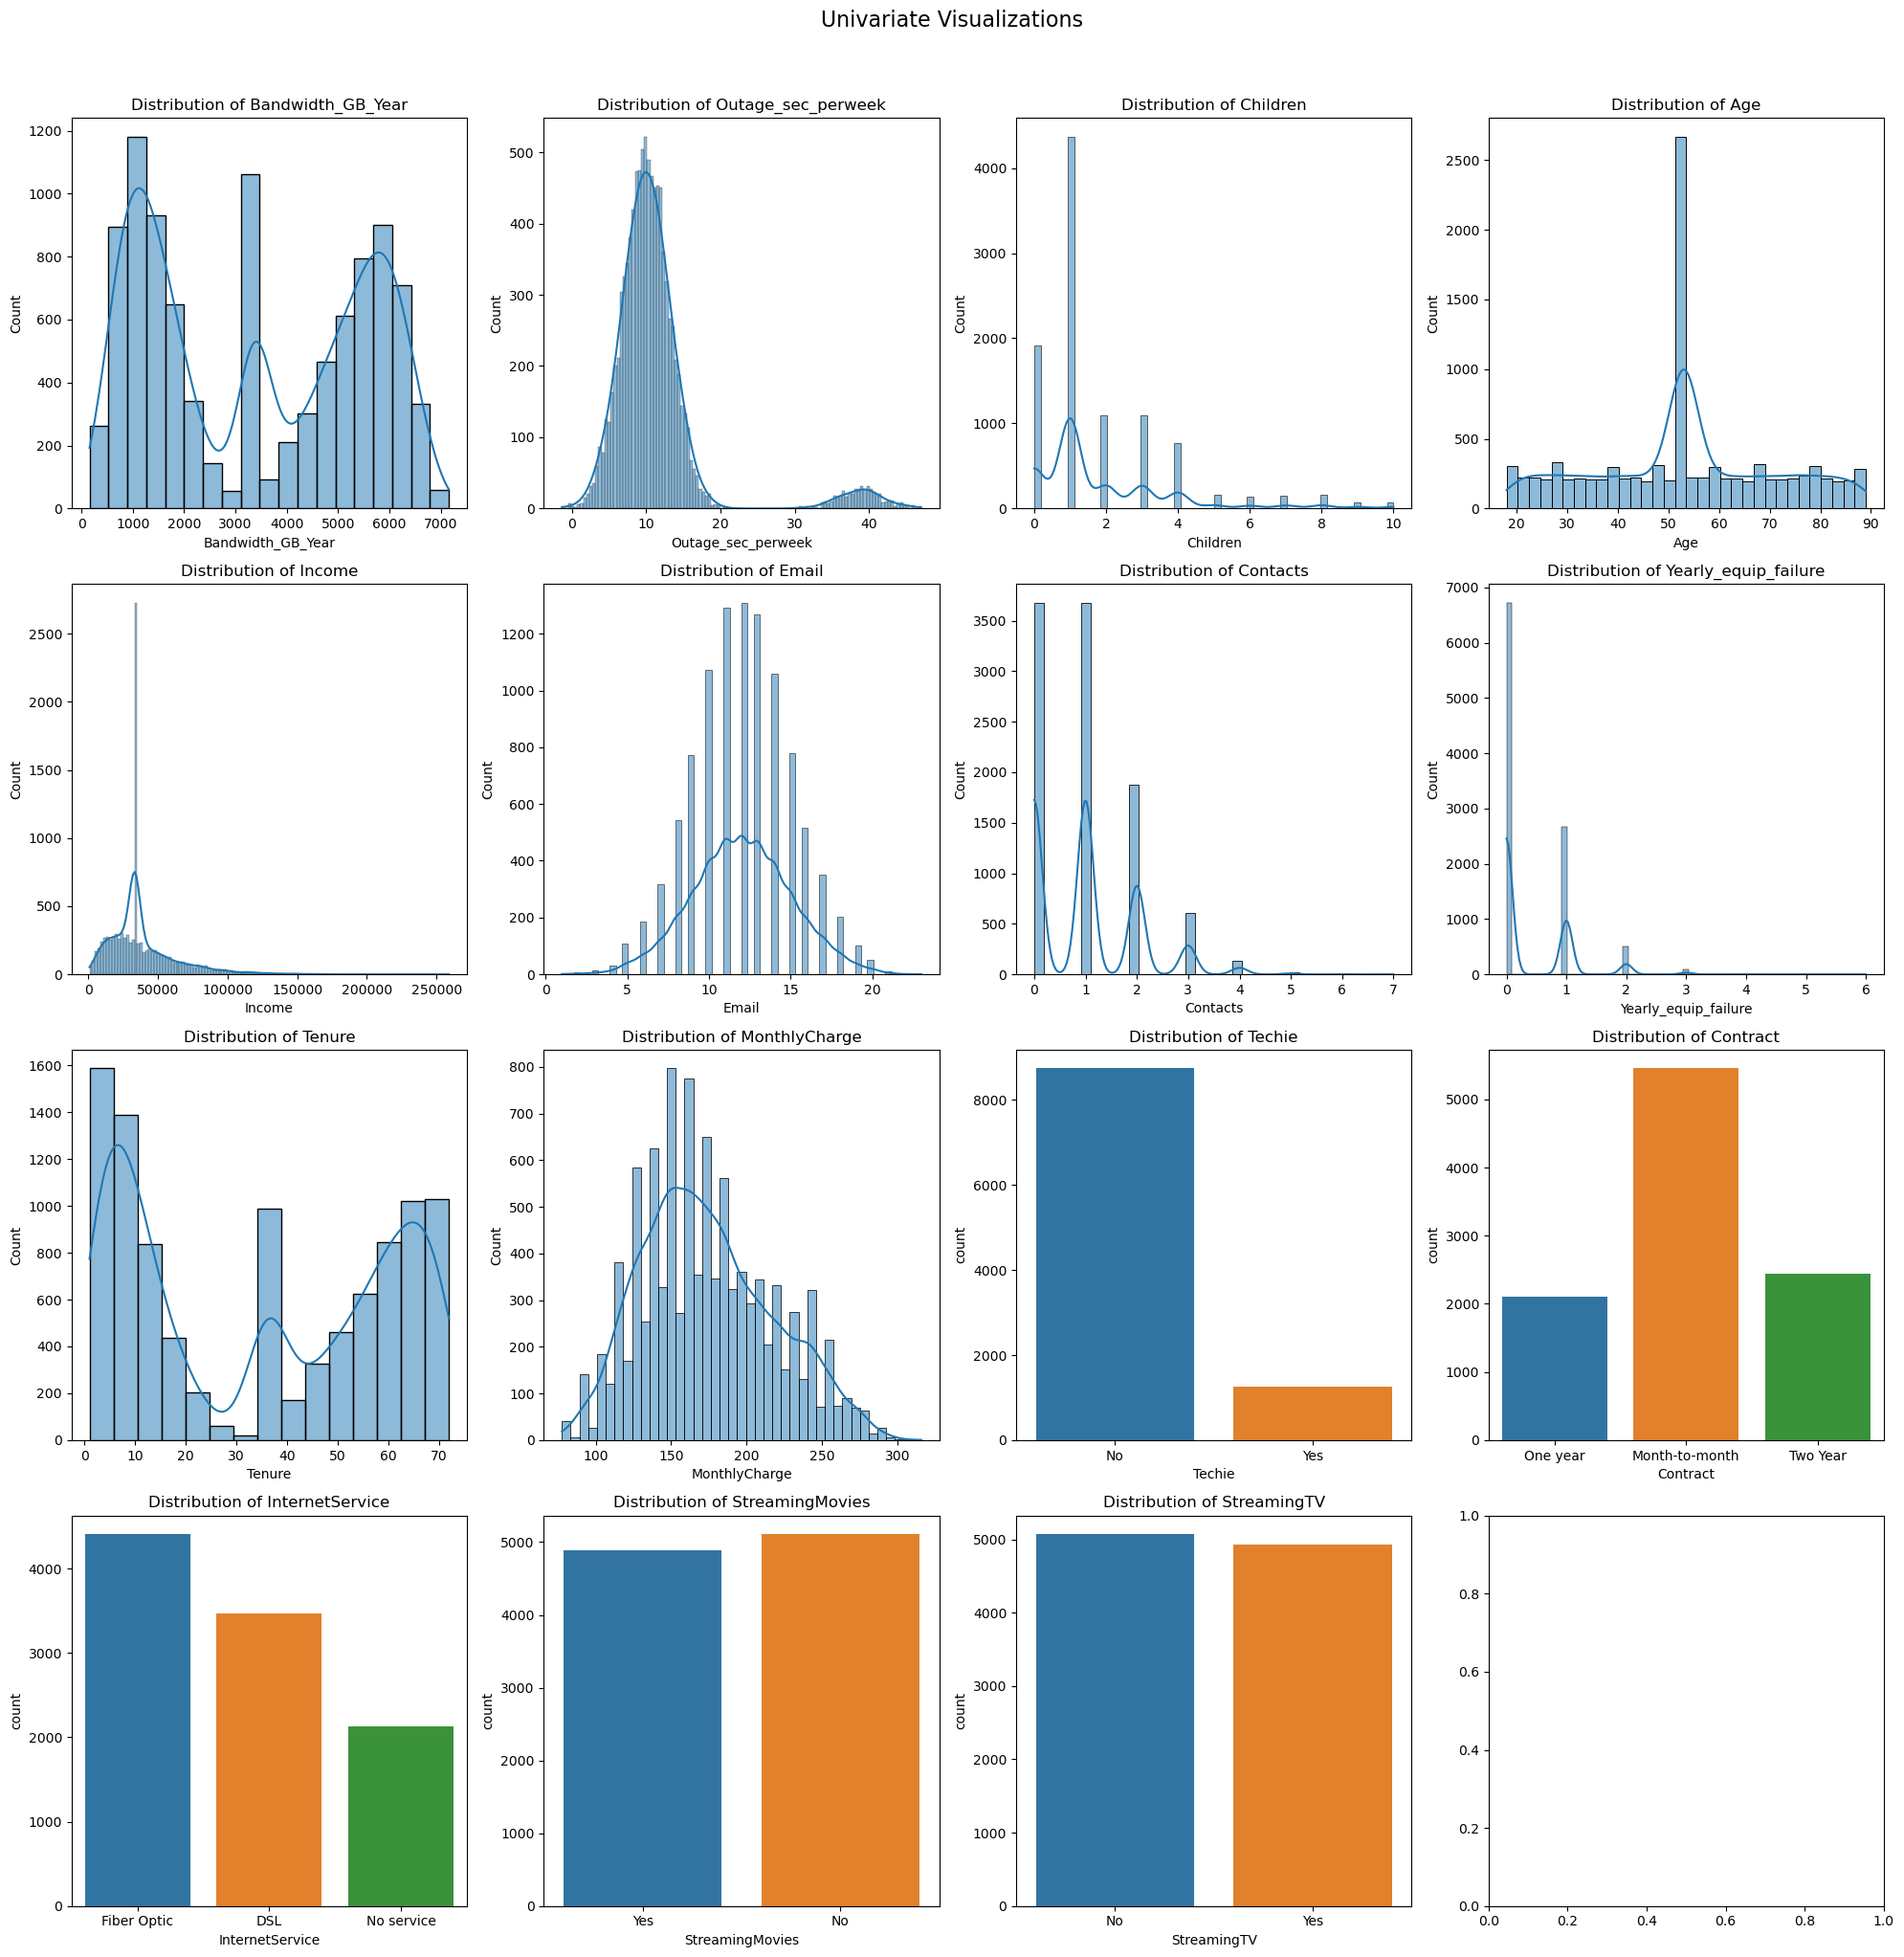

In [13]:
# Set up the figure layout for univariate visualizations
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
fig.suptitle("Univariate Visualizations", fontsize=16, y=1.02)

# Univariate visualizations for numerical variables


for i, col in enumerate(num_vars):
    ax = axes[i // 4, i % 4]
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')
    
for i, col in enumerate(cat_vars):
    ax = axes[(i + len(num_vars)) // 4, (i + len(num_vars)) % 4]
    sns.countplot(x=df[col], ax=ax)
    ax.set_title(f'Distribution of {col}')

plt.savefig('univariate_numberical & categorical.png')

plt.tight_layout()
plt.show()


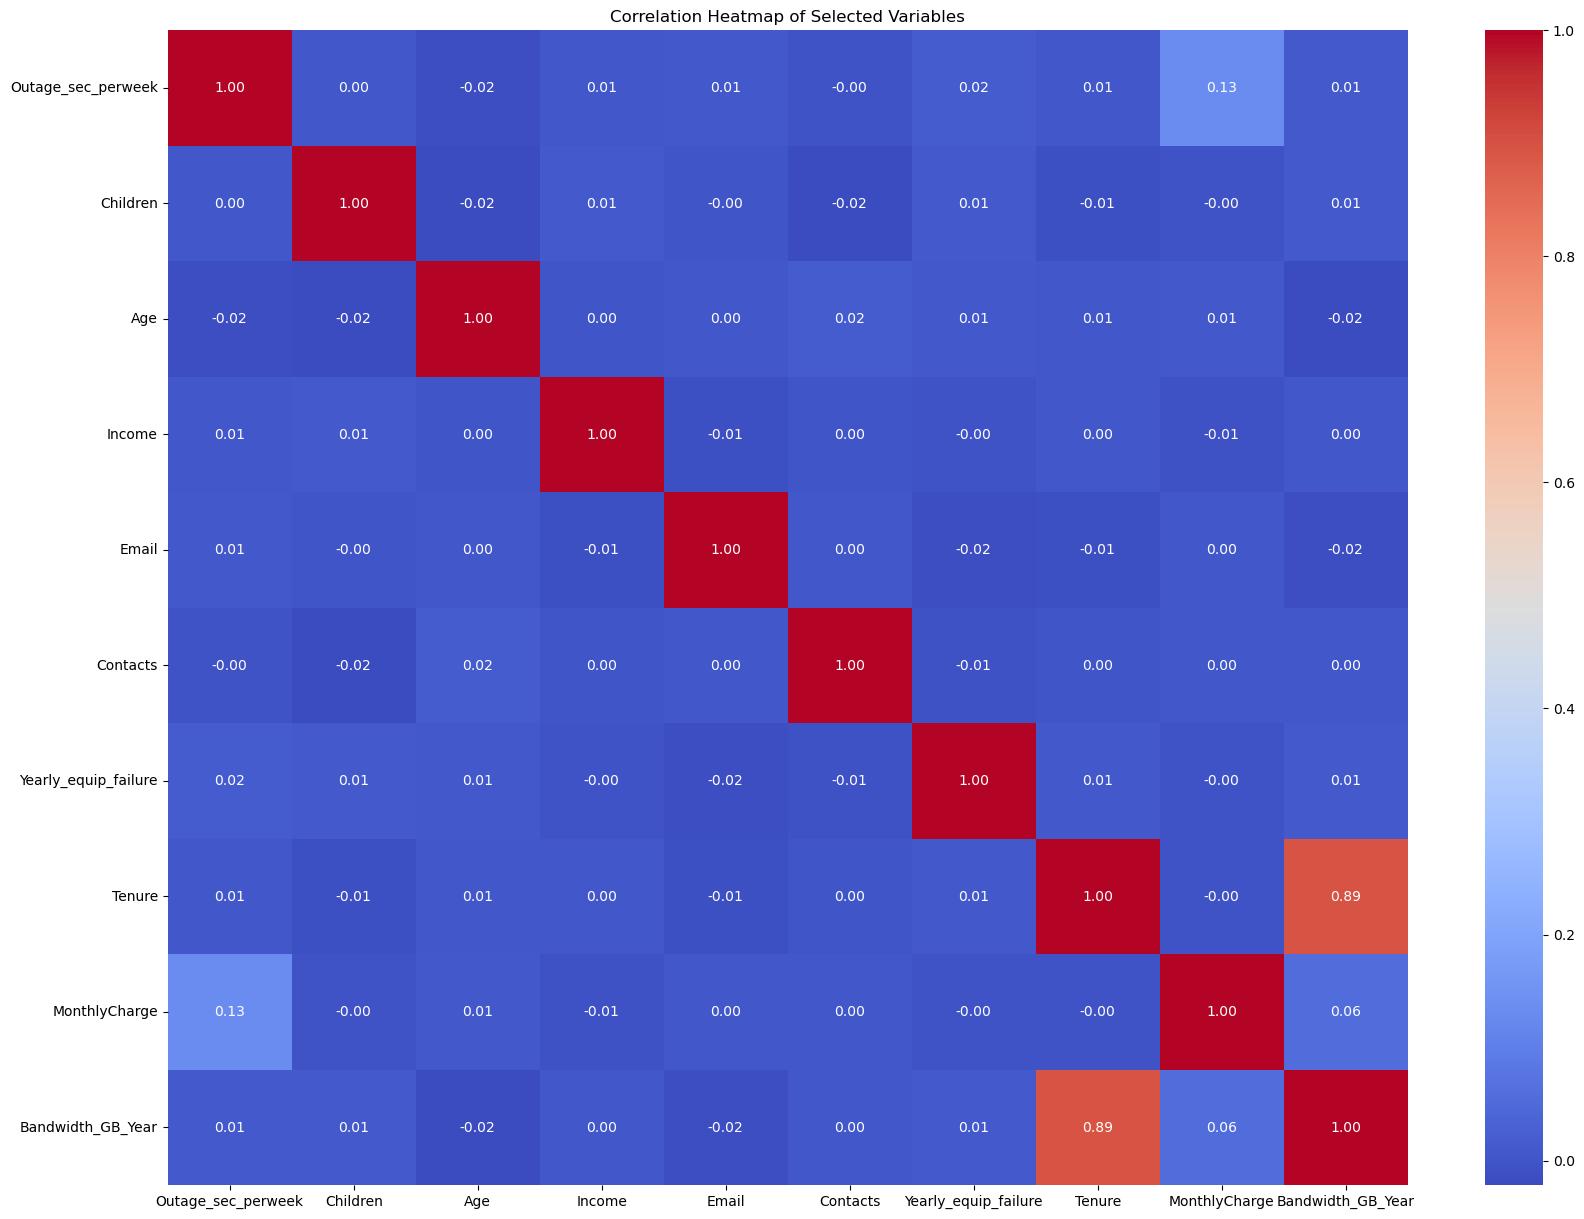

In [14]:
# Define the variables for the heatmap
heatmap_vars = ['Outage_sec_perweek', 'Children', 'Age', 'Income', 'Email', 'Contacts', 
                'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year'] + \
               [col for col in df.columns if col.startswith('Dummy')]

# Create a correlation matrix
corr_matrix = df[heatmap_vars].corr()

# Create a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Selected Variables')
plt.savefig('heatmap.png')
plt.show()

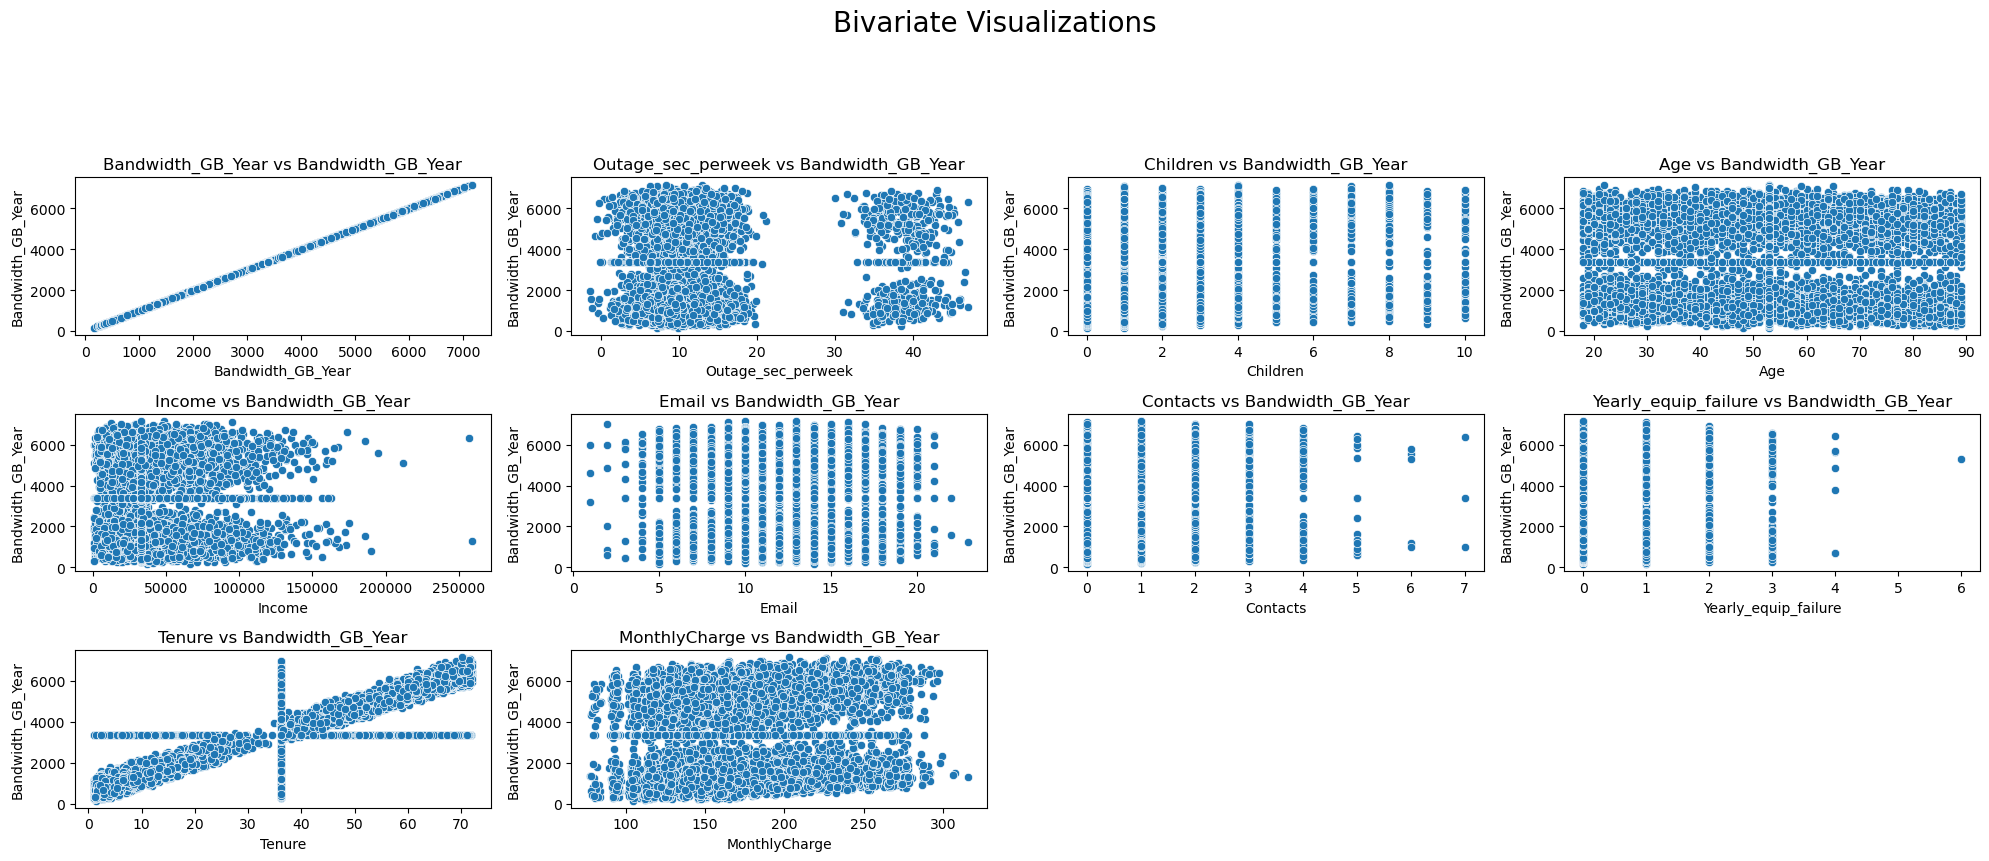

In [37]:
# Set up the figure layout for bivariate visualizations
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20., 10))
fig.suptitle("Bivariate Visualizations", fontsize=20, y=1.05)

X = df[num_vars]
y = df['Bandwidth_GB_Year']

# Bivariate visualizations (scatter plots) for numerical variables vs. dependent variable
for i, col in enumerate(num_vars):
    ax = axes[i // 4, i % 4]
    sns.scatterplot(x=df[col], y=y, ax=ax)
    ax.set_title(f'{col} vs Bandwidth_GB_Year')
    # Remove empty subplots
for j in range(i + 1, len(axes.flatten())):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the suptitle
plt.savefig('bivariate_numerical3.png')
plt.show()


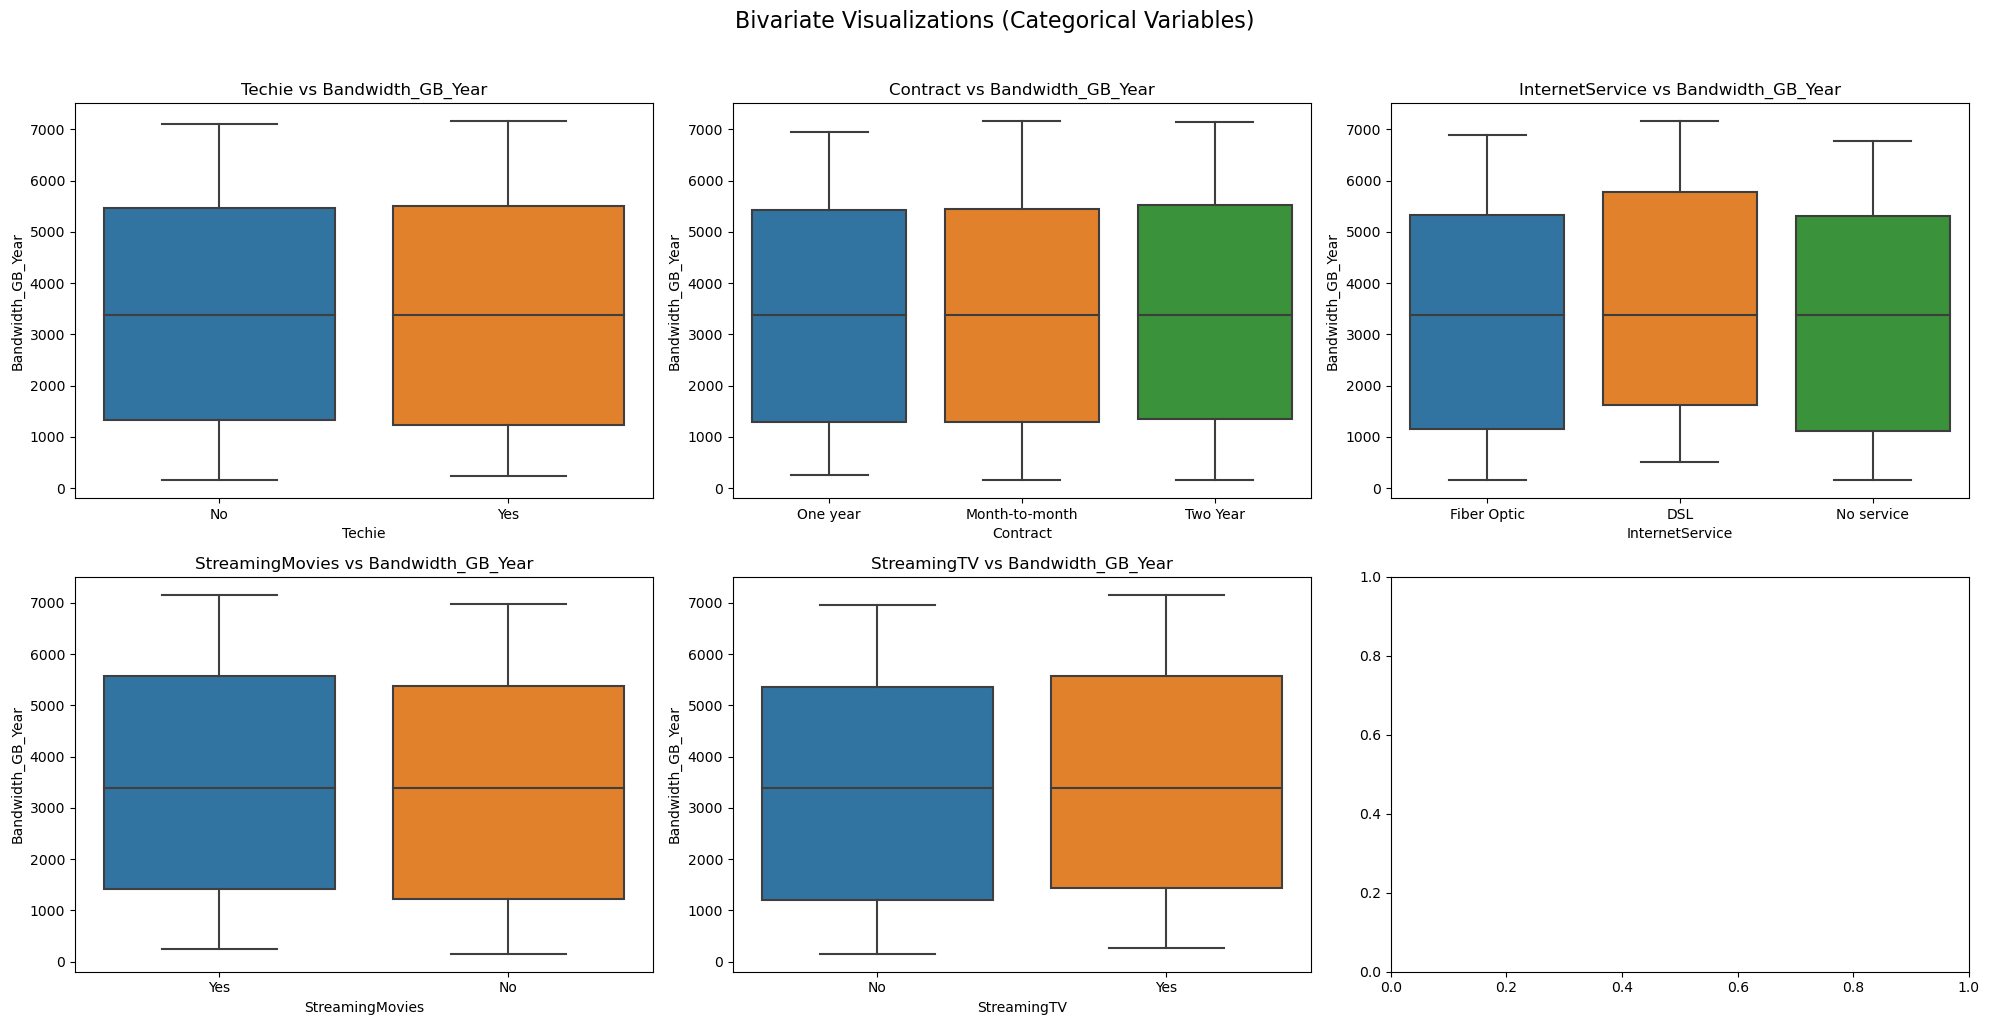

In [38]:
# Set up the figure layout for bivariate visualizations for categorical variables
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
fig.suptitle("Bivariate Visualizations (Categorical Variables)", fontsize=16, y=1.02)
# Bivariate visualizations (box plots) for categorical variables vs. dependent variable
for i, col in enumerate(cat_vars):
    ax = axes[i // 3, i % 3]
    sns.boxplot(x=df[col], y=y, ax=ax)
    ax.set_title(f'{col} vs Bandwidth_GB_Year')

plt.tight_layout()
plt.savefig('bivariate_categorical2.png')
plt.show()

In [39]:
df_encoded =pd.get_dummies(df_model[cat_vars], drop_first = True, dtype = 'int')
df_encoded.head()

,Techie_Yes,Contract_One year,Contract_Two Year,InternetService_Fiber Optic,InternetService_No service,StreamingMovies_Yes,StreamingTV_Yes
0,0,1,0,1,0,1,0
1,1,0,0,1,0,1,1
2,1,0,1,0,0,1,0
3,1,0,1,0,0,0,1
4,0,0,0,1,0,0,1


In [40]:
df_transformed = pd.concat([df_model[num_vars], df_encoded], axis=1)
df_transformed.head()
df_transformed.columns

Index(['Bandwidth_GB_Year', 'Outage_sec_perweek', 'Children', 'Age', 'Income',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
       'Techie_Yes', 'Contract_One year', 'Contract_Two Year',
       'InternetService_Fiber Optic', 'InternetService_No service',
       'StreamingMovies_Yes', 'StreamingTV_Yes'],
      dtype='object')

In [41]:
# Drop the unnamed column if it exists
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
# C5:Save cleaned CSV
df_transformed.to_csv('transformed_data.csv', index=False)

print(df_transformed)

      Bandwidth_GB_Year  Outage_sec_perweek  Children   Age     Income  Email  \
0            904.536110            6.972566       1.0  68.0  28561.990     10   
1            800.982766           12.014541       1.0  27.0  21704.770     12   
2           2054.706961           10.245616       4.0  50.0  33186.785      9   
3           2164.579412           15.206193       1.0  48.0  18925.230     15   
4            271.493436            8.960316       0.0  83.0  40074.190     16   
...                 ...                 ...       ...   ...        ...    ...   
9995        6511.253000            9.265392       3.0  53.0  55723.740     12   
9996        5695.952000            8.115849       4.0  48.0  33186.785     15   
9997        4159.306000            4.837696       1.0  53.0  33186.785     10   
9998        6468.457000           12.076460       1.0  39.0  16667.580     14   
9999        5857.586000           12.641760       1.0  28.0  33186.785     17   

      Contacts  Yearly_equi

In [63]:
#D1: initial model
y = df_transformed["Bandwidth_GB_Year"]
X = df_transformed.drop(["Bandwidth_GB_Year"], axis=1)
X =  sm.add_constant(X)

initial_model = sm.OLS(y, X).fit()
print(initial_model.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     2740.
Date:                Sat, 27 Jul 2024   Prob (F-statistic):               0.00
Time:                        00:35:06   Log-Likelihood:                -82132.
No. Observations:               10000   AIC:                         1.643e+05
Df Residuals:                    9983   BIC:                         1.644e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [64]:
# Extract and print the coefficients
coefficients = initial_model.params
print("Coefficients:\n", coefficients)

# Print the regression equation
regression_eq = "Bandwidth_GB_Year = " + str(round(coefficients['const'], 4))
for variable in X.columns[1:]:
    regression_eq += f" + ({round(coefficients[variable], 4)} * {variable})"
print("\nRegression Equation:")
print(regression_eq)

Coefficients:
 const                          716.100316
Outage_sec_perweek              -0.058545
Children                        23.751239
Age                             -3.019142
Income                          -0.000198
Email                           -5.552436
Contacts                         6.521663
Yearly_equip_failure            10.969225
Tenure                          73.554592
MonthlyCharge                    3.052542
Techie_Yes                     -12.144909
Contract_One year              -18.464129
Contract_Two Year               18.011608
InternetService_Fiber Optic   -456.764003
InternetService_No service    -322.806617
StreamingMovies_Yes             16.922010
StreamingTV_Yes                 90.886326
dtype: float64

Regression Equation:
Bandwidth_GB_Year = 716.1003 + (-0.0585 * Outage_sec_perweek) + (23.7512 * Children) + (-3.0191 * Age) + (-0.0002 * Income) + (-5.5524 * Email) + (6.5217 * Contacts) + (10.9692 * Yearly_equip_failure) + (73.5546 * Tenure) + (3.0525 * 

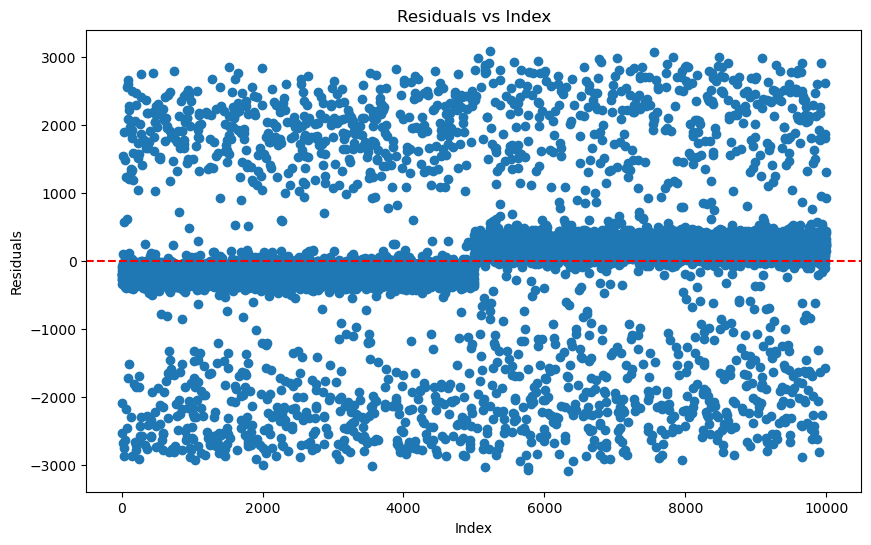

In [65]:
# Calculate residuals
residuals = initial_model.resid

# Plot residuals vs index
plt.figure(figsize=(10, 6))
plt.plot(residuals, marker='o', linestyle='None')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.title('Residuals vs Index')
plt.show()


In [66]:
#D3: Reducing the model
while True:
    reduced_model = sm.OLS(y, X).fit()
    p_values = reduced_model.pvalues
    max_p_value = p_values.max()
    excluded_feature = p_values.idxmax()
    
    if max_p_value > 0.05 and excluded_feature in X.columns:
        X = X.drop(columns=[excluded_feature])
        print(f"Removed {excluded_feature} with p_-values {max_p_value}")
    else:
        break  


Removed Outage_sec_perweek with p_-values 0.9643256116787247
Removed Techie_Yes with p_-values 0.6525761034101272
Removed Income with p_-values 0.5798867048049601
Removed StreamingMovies_Yes with p_-values 0.5136773230920348
Removed Contacts with p_-values 0.4647189411222564
Removed Yearly_equip_failure with p_-values 0.43408979022892846
Removed Contract_One year with p_-values 0.42151865745676464
Removed Contract_Two Year with p_-values 0.2640786752419224
Removed Email with p_-values 0.06281826975174186


In [67]:
print (reduced_model.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     6262.
Date:                Sat, 27 Jul 2024   Prob (F-statistic):               0.00
Time:                        00:36:11   Log-Likelihood:                -82135.
No. Observations:               10000   AIC:                         1.643e+05
Df Residuals:                    9992   BIC:                         1.643e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [68]:
# Calculate Residual Standard Error for the reduced model
residuals = reduced_model.resid
rss = sum(residuals ** 2)
rse = np.sqrt(rss / (len(y) - len(reduced_model.params) - 1))

# Compare initial and reduced models
initial_model_metrics = {
    "R-squared": initial_model.rsquared,
    "Adjusted R-squared": initial_model.rsquared_adj,
    "AIC": initial_model.aic
}

reduced_model_metrics = {
    "R-squared": reduced_model.rsquared,
    "Adjusted R-squared": reduced_model.rsquared_adj,
    "AIC": reduced_model.aic
}

print("\nModel Comparison:")
print(f"Initial Model - R-squared: {initial_model_metrics['R-squared']}, Adjusted R-squared: {initial_model_metrics['Adjusted R-squared']}, AIC: {initial_model_metrics['AIC']}")
print(f"Reduced Model - R-squared: {reduced_model_metrics['R-squared']}, Adjusted R-squared: {reduced_model_metrics['Adjusted R-squared']}, AIC: {reduced_model_metrics['AIC']}")


Model Comparison:
Initial Model - R-squared: 0.8145003518349279, Adjusted R-squared: 0.8142030469796098, AIC: 164297.07459252412
Reduced Model - R-squared: 0.814362159178938, Adjusted R-squared: 0.81423210864994, AIC: 164286.52157195774


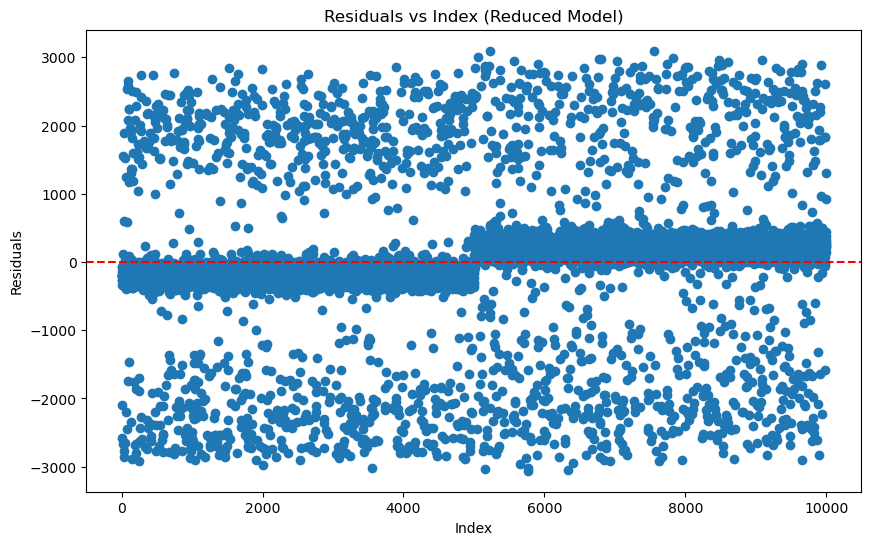

In [69]:
# Residual plots for the reduced model
plt.figure(figsize=(10, 6))
plt.plot(residuals, marker='o', linestyle='None')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.title('Residuals vs Index (Reduced Model)')
plt.savefig('residuals_reduced_model.png')
plt.show()


In [70]:
# Extract and print the coefficients for the reduced model
coefficients = reduced_model.params
print("Coefficients:\n", coefficients)



Coefficients:
 const                          633.537127
Children                        23.737875
Age                             -3.009305
Tenure                          73.570845
MonthlyCharge                    3.221705
InternetService_Fiber Optic   -459.966664
InternetService_No service    -321.058186
StreamingTV_Yes                 83.249993
dtype: float64


In [71]:
# Create the regression equation string
regression_eq = f"Bandwidth_GB_Year = {coefficients['const']:.4f}"
for variable in coefficients.index[1:]:
    regression_eq += f" + ({coefficients[variable]:.4f} * {variable})"

print("\nReduced Regression Equation:")
print(regression_eq)


Reduced Regression Equation:
Bandwidth_GB_Year = 633.5371 + (23.7379 * Children) + (-3.0093 * Age) + (73.5708 * Tenure) + (3.2217 * MonthlyCharge) + (-459.9667 * InternetService_Fiber Optic) + (-321.0582 * InternetService_No service) + (83.2500 * StreamingTV_Yes)
